In [2]:
import pandas
data = pandas.read_csv('data/train.csv')

In [7]:
from sklearn.preprocessing import OneHotEncoder
import numpy
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import re

scaler = preprocessing.StandardScaler()

data = pandas.read_csv('data/train.csv')
X = data.select_dtypes(exclude=['object']).drop('SalePrice', axis=1)
y = data.SalePrice
my_imputer = SimpleImputer(strategy='mean')
X_imputed = my_imputer.fit_transform(X)
X_categorical = data.select_dtypes(include=['object'])
my_imputer = SimpleImputer(strategy='most_frequent')
X_categorical_imputed = my_imputer.fit_transform(X_categorical)
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit(X_categorical_imputed)
transformed = encoded.fit_transform(X_categorical_imputed)
merged = numpy.concatenate((X_imputed, transformed.toarray()), axis=1)
merged_columns = [c for c in X.columns] + [c for c in encoded.get_feature_names()]
print(len(merged_columns))
print(merged.shape)
merged_data_frame = pandas.DataFrame(data=merged, columns=merged_columns)
columns_dict = {}
for column in merged_data_frame:
    columns_dict[column] = re.sub('[^A-Za-z0-9_.-/]*', '', column)
merged_data_frame = merged_data_frame.rename(index=str, columns=columns_dict)
merged_columns = merged_data_frame.columns
merged_data_frame.columns

289
(1460, 289)


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'x41_ConLw', 'x41_New', 'x41_Oth', 'x41_WD', 'x42_Abnorml',
       'x42_AdjLand', 'x42_Alloca', 'x42_Family', 'x42_Normal', 'x42_Partial'],
      dtype='object', length=289)

In [8]:
import tensorflow as tf
feature_columns = [
        tf.feature_column.numeric_column(column) for column in merged_columns]
x_train, x_test, y_train, y_test = train_test_split(
        merged_data_frame, y, test_size=0.2)
#x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test)


In [185]:
def convert_data_frame_to_dictionary_numpy(data_frame):
    result = {}
    for column in data_frame.columns:
        result[column] = data_frame[column].values
    return result


In [186]:
regressor = tf.estimator.DNNRegressor(
        feature_columns=feature_columns, hidden_units=[10, 10], model_dir='models/housing')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'models/housing', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f926852fcc0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [196]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=convert_data_frame_to_dictionary_numpy(x_train), y=y_train.values, 
    batch_size=100, num_epochs=None, shuffle=True)
regressor.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models/housing/model.ckpt-62000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 62000 into models/housing/model.ckpt.
INFO:tensorflow:loss = 136679840000.0, step = 62001
INFO:tensorflow:global_step/sec: 17.2569
INFO:tensorflow:loss = 299562100000.0, step = 62101 (5.799 sec)
INFO:tensorflow:global_step/sec: 20.745
INFO:tensorflow:loss = 133435350000.0, step = 62201 (4.820 sec)
INFO:tensorflow:global_step/sec: 17.9561
INFO:tensorflow:loss = 196752600000.0, step = 62301 (5.571 sec)
INFO:tensorflow:global_step/sec: 15.6303
INFO:tensorflow:loss = 114533370000.0, step = 62401 (6.397 sec)
INFO:tensorflow:global_step/sec: 16.4111
INFO:tensorflow:loss = 194818470000.0, step = 62501 (6.093 sec)
INFO:tensorflow:global_step/sec: 17.

INFO:tensorflow:loss = 181993440000.0, step = 69501 (6.292 sec)
INFO:tensorflow:global_step/sec: 16.692
INFO:tensorflow:loss = 109251650000.0, step = 69601 (5.991 sec)
INFO:tensorflow:global_step/sec: 16.0828
INFO:tensorflow:loss = 142236910000.0, step = 69701 (6.220 sec)
INFO:tensorflow:global_step/sec: 15.2103
INFO:tensorflow:loss = 115556560000.0, step = 69801 (6.582 sec)
INFO:tensorflow:global_step/sec: 17.1475
INFO:tensorflow:loss = 140660540000.0, step = 69901 (5.823 sec)
INFO:tensorflow:global_step/sec: 15.8244
INFO:tensorflow:loss = 105752265000.0, step = 70001 (6.318 sec)
INFO:tensorflow:global_step/sec: 16.1698
INFO:tensorflow:loss = 99433580000.0, step = 70101 (6.185 sec)
INFO:tensorflow:global_step/sec: 16.2981
INFO:tensorflow:loss = 161332300000.0, step = 70201 (6.146 sec)
INFO:tensorflow:global_step/sec: 15.9187
INFO:tensorflow:loss = 104672220000.0, step = 70301 (6.273 sec)
INFO:tensorflow:global_step/sec: 16.3586
INFO:tensorflow:loss = 91368760000.0, step = 70401 (6.113

INFO:tensorflow:global_step/sec: 16.3492
INFO:tensorflow:loss = 226802500000.0, step = 77301 (6.115 sec)
INFO:tensorflow:global_step/sec: 15.2664
INFO:tensorflow:loss = 145199610000.0, step = 77401 (6.551 sec)
INFO:tensorflow:global_step/sec: 15.5399
INFO:tensorflow:loss = 185954040000.0, step = 77501 (6.435 sec)
INFO:tensorflow:global_step/sec: 15.9256
INFO:tensorflow:loss = 156048340000.0, step = 77601 (6.279 sec)
INFO:tensorflow:global_step/sec: 16.2152
INFO:tensorflow:loss = 125633150000.0, step = 77701 (6.167 sec)
INFO:tensorflow:global_step/sec: 16.0682
INFO:tensorflow:loss = 89885475000.0, step = 77801 (6.225 sec)
INFO:tensorflow:global_step/sec: 16.2671
INFO:tensorflow:loss = 209455220000.0, step = 77901 (6.162 sec)
INFO:tensorflow:global_step/sec: 15.9373
INFO:tensorflow:loss = 350704570000.0, step = 78001 (6.259 sec)
INFO:tensorflow:global_step/sec: 15.7133
INFO:tensorflow:loss = 99509530000.0, step = 78101 (6.365 sec)
INFO:tensorflow:global_step/sec: 15.9766
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 15.9392
INFO:tensorflow:loss = 86584934000.0, step = 85101 (6.278 sec)
INFO:tensorflow:global_step/sec: 14.9783
INFO:tensorflow:loss = 142773620000.0, step = 85201 (6.674 sec)
INFO:tensorflow:global_step/sec: 15.9423
INFO:tensorflow:loss = 174004810000.0, step = 85301 (6.273 sec)
INFO:tensorflow:global_step/sec: 15.781
INFO:tensorflow:loss = 93280264000.0, step = 85401 (6.342 sec)
INFO:tensorflow:global_step/sec: 18.3879
INFO:tensorflow:loss = 136449770000.0, step = 85501 (5.432 sec)
INFO:tensorflow:global_step/sec: 13.1031
INFO:tensorflow:loss = 105797460000.0, step = 85601 (7.635 sec)
INFO:tensorflow:global_step/sec: 15.9291
INFO:tensorflow:loss = 119819270000.0, step = 85701 (6.276 sec)
INFO:tensorflow:global_step/sec: 17.413
INFO:tensorflow:loss = 201632760000.0, step = 85801 (5.752 sec)
INFO:tensorflow:global_step/sec: 15.4693
INFO:tensorflow:loss = 121460620000.0, step = 85901 (6.457 sec)
INFO:tensorflow:global_step/sec: 17.0081
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 16.2178
INFO:tensorflow:loss = 151036380000.0, step = 92901 (6.167 sec)
INFO:tensorflow:global_step/sec: 16.7707
INFO:tensorflow:loss = 107823790000.0, step = 93001 (5.960 sec)
INFO:tensorflow:global_step/sec: 15.9676
INFO:tensorflow:loss = 65584300000.0, step = 93101 (6.263 sec)
INFO:tensorflow:global_step/sec: 15.7297
INFO:tensorflow:loss = 94864830000.0, step = 93201 (6.357 sec)
INFO:tensorflow:global_step/sec: 16.4043
INFO:tensorflow:loss = 127359190000.0, step = 93301 (6.095 sec)
INFO:tensorflow:global_step/sec: 15.565
INFO:tensorflow:loss = 80622110000.0, step = 93401 (6.426 sec)
INFO:tensorflow:global_step/sec: 15.933
INFO:tensorflow:loss = 92495730000.0, step = 93501 (6.280 sec)
INFO:tensorflow:global_step/sec: 16.7697
INFO:tensorflow:loss = 83353460000.0, step = 93601 (5.960 sec)
INFO:tensorflow:global_step/sec: 16.2997
INFO:tensorflow:loss = 142309670000.0, step = 93701 (6.135 sec)
INFO:tensorflow:global_step/sec: 16.2095
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 15.8083
INFO:tensorflow:loss = 114374990000.0, step = 100701 (6.326 sec)
INFO:tensorflow:global_step/sec: 16.7492
INFO:tensorflow:loss = 211905690000.0, step = 100801 (5.973 sec)
INFO:tensorflow:global_step/sec: 15.8957
INFO:tensorflow:loss = 88570110000.0, step = 100901 (6.298 sec)
INFO:tensorflow:global_step/sec: 16.4047
INFO:tensorflow:loss = 77045040000.0, step = 101001 (6.090 sec)
INFO:tensorflow:global_step/sec: 15.6174
INFO:tensorflow:loss = 70614910000.0, step = 101101 (6.405 sec)
INFO:tensorflow:global_step/sec: 16.6267
INFO:tensorflow:loss = 261571900000.0, step = 101201 (6.015 sec)
INFO:tensorflow:global_step/sec: 16.5325
INFO:tensorflow:loss = 105890520000.0, step = 101301 (6.044 sec)
INFO:tensorflow:global_step/sec: 15.843
INFO:tensorflow:loss = 147895570000.0, step = 101401 (6.312 sec)
INFO:tensorflow:global_step/sec: 16.257
INFO:tensorflow:loss = 89926130000.0, step = 101501 (6.154 sec)
INFO:tensorflow:global_step/sec: 15.2768
INFO:tensor

INFO:tensorflow:global_step/sec: 16.3135
INFO:tensorflow:loss = 312890980000.0, step = 108501 (6.123 sec)
INFO:tensorflow:global_step/sec: 16.4448
INFO:tensorflow:loss = 94788880000.0, step = 108601 (6.079 sec)
INFO:tensorflow:global_step/sec: 15.7343
INFO:tensorflow:loss = 130906730000.0, step = 108701 (6.356 sec)
INFO:tensorflow:global_step/sec: 15.9599
INFO:tensorflow:loss = 120615950000.0, step = 108801 (6.266 sec)
INFO:tensorflow:global_step/sec: 15.7466
INFO:tensorflow:loss = 86815375000.0, step = 108901 (6.352 sec)
INFO:tensorflow:global_step/sec: 16.5448
INFO:tensorflow:loss = 84019410000.0, step = 109001 (6.056 sec)
INFO:tensorflow:global_step/sec: 15.7437
INFO:tensorflow:loss = 98897140000.0, step = 109101 (6.338 sec)
INFO:tensorflow:global_step/sec: 15.8695
INFO:tensorflow:loss = 153837850000.0, step = 109201 (6.301 sec)
INFO:tensorflow:global_step/sec: 15.5034
INFO:tensorflow:loss = 103063460000.0, step = 109301 (6.451 sec)
INFO:tensorflow:global_step/sec: 15.4418
INFO:tens

In [197]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=convert_data_frame_to_dictionary_numpy(x_test), y=y_test.values, num_epochs=1, shuffle=False)
predictions = regressor.predict(input_fn=test_input_fn)
y_predict = numpy.array(list(p['predictions'] for p in predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from models/housing/model.ckpt-112000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [198]:
from sklearn import metrics
score_sklearn = metrics.mean_absolute_error(y_predict, y_test)
score_sklearn

24098.981699486303

In [10]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [12]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(merged.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                18560     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 22,785
Trainable params: 22,785
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(merged, y, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

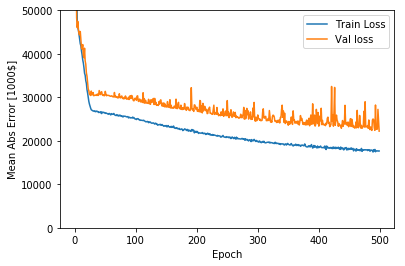

In [27]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0, 50000])

plot_history(history)



....................................................................................................
.......................................................................

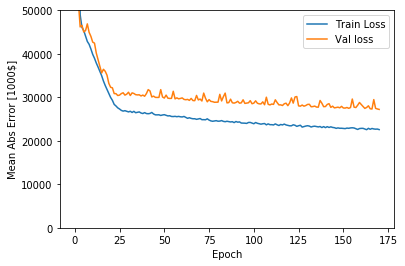

In [34]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=150)

history = model.fit(merged, y, epochs=1000,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

